In [74]:
import os
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline

homedir = os.getenv("HOME")
path_to_im = homedir+'/Desktop/im.png'

In [179]:
img_only = Image.open(path_to_im)
img = np.asarray(img_only)

height = np.shape(img)[0]
width = np.shape(img)[1]

In [168]:
def get_scaling_fraction(height,width):

    if height>width:
        fraction = width/height
        return 1, fraction
    elif width>height:
        fraction = height/width
        return fraction, 1
    elif width==height:
        return  1, 1
    else:
        print("I don't know what to tell ye. Your width and height are not numbers.")
        return None

In [222]:
#a hearty DANKE to stackexchange

#this function is mine; it helps ensure that pixel cells are square- and not rectangular-shaped
frac_h, frac_w = get_scaling_fraction(height,width)

#resize smoothly down to desired number of pixels for x (55*frac_w) and y (55*frac_h)
imgSmall = img_only.resize((int(55*frac_w),int(55*frac_h)), resample=Image.Resampling.BILINEAR)

#scale back up to original size, if desired...
#result = imgSmall.resize(img_only.size, resample=Image.Resampling.NEAREST)

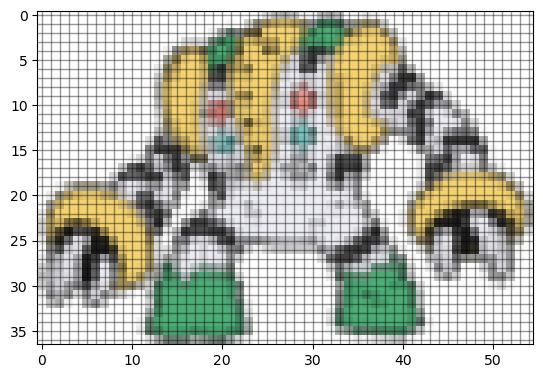

In [208]:
plt.imshow(imgSmall)
for i in range(np.shape(imgSmall)[0]):
    plt.axhline(i,lw=1,color='black',alpha=0.4)
for i in range(np.shape(imgSmall)[1]):
    plt.axvline(i,lw=1,color='black',alpha=0.4)

I clearly need to add a grid offset in order for it to align properly with the pixel cells. After a bit of testing, it appears that 0.35 is sufficient here...

In [217]:
def add_grid(image_array):
     
    for n in range(np.shape(image_array)[0]):
        plt.axhline(n+0.35,lw=1,color='black',alpha=0.4)
    for n in range(np.shape(image_array)[1]):
        plt.axvline(n+0.35,lw=1,color='black',alpha=0.4)    

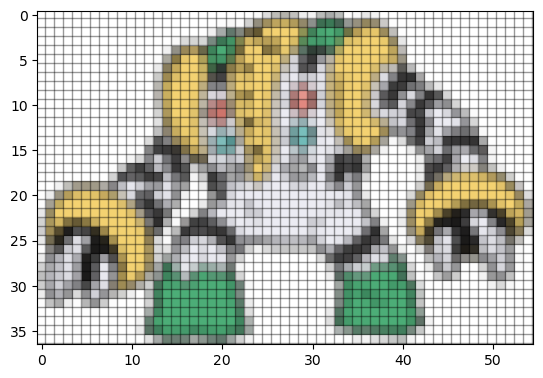

In [218]:
plt.imshow(imgSmall)
add_grid(imgSmall)

let's try one more image -- just for testing.

In [223]:
img_only = Image.open(homedir+'/Desktop/im2.jpg')
img = np.asarray(img_only)

height = np.shape(img)[0]
width = np.shape(img)[1]

In [224]:
frac_h, frac_w = get_scaling_fraction(height,width)

imgSmall = img_only.resize((int(55*frac_w),int(55*frac_h)), resample=Image.Resampling.BILINEAR)

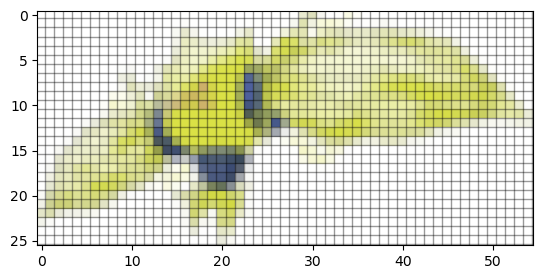

In [225]:
plt.imshow(imgSmall)
add_grid(imgSmall)

Okay. 0.35 it is. I'll go ahead and streamline this bugger.

In [264]:
!python pixelate.py -im_path ~/Desktop/im2.jpg -nx 50 -grid_offset 0.5

Image saved to Desktop.


# yay.